<a href="https://colab.research.google.com/github/rebsfeitosa/fraud_detection/blob/main/P01_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o notebook
sns.set_style()

# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
# importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Para começar é importante verificar a quantidade de entradas e variáveis do dataset e entender o tipo de dado que cada coluna contém. Também iremos verificar o nome de todas as colunas do dataset e de qual tipo elas são.



In [ ]:
#Verificando a quantidade de linhas e colunas do dataset
print('Dimensões do dataset',
      '\nVariáveis: ',df.shape[1], '\n'
      'Entradas: ', df.shape[0])

#Verificando as primeiras entradas do dataset
df.head()

Dimensões do dataset 
Variáveis:  31 
Entradas:  284807


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Há valores nulos?**

Um dos problemas mais comuns que podemos enfrentar na limpeza e exploração de dados é lidar com os valores ausentes. A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
#verificando se há valores nulos 
print('Temos valores nulos?', df.isnull().values.any())

Temos valores nulos? False


**Dividindo dados entre fraudulentos e normais**

Vou separar os dados para que eu tenha o conjunto de dados que correspondem a transações fraudulentas e o conjunto que os dados correspondem a transações normais afim de facilitar a análise e verificar suas dimensões separadamente.

In [ ]:
normal = df[df['Class'] == 0]
fraude = df[df['Class'] == 1]

In [ ]:
#verificando as dimensões dos datasets com transações normais e fraudulentas

print('Dimensões transações legítimas',
    '\nVariáveis: ',normal.shape[1], "\n"
      'Entradas: ', normal.shape[0])
print('Dimensões transações fraudulentas',
    '\nVariáveis: ',fraude.shape[1], "\n"
      'Entradas: ', fraude.shape[0])

Dimensões transações legítimas 
Variáveis:  31 
Entradas:  284315
Dimensões transações fraudulentas 
Variáveis:  31 
Entradas:  492


É possível verificar que o dataset está bem desbalanceado. A quantidade de transações legítimas é extremamente maior que a quantidade de transações fraudulentas. Vamos seguir com a análise...

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

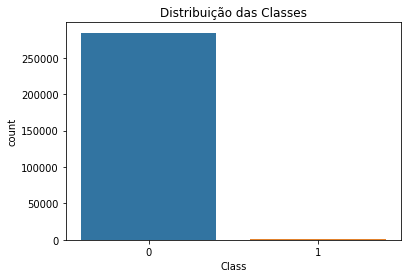

In [ ]:
#visualizando o desbalanceamento 
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

Vamos verificar algumas estatísticas importantes das operações normais 

In [ ]:
normal[['Amount', 'Time']].describe()

,Amount,Time
count,284315.000000,284315.000000
mean,88.291022,94838.202258
std,250.105092,47484.015786
min,0.000000,0.000000
25%,5.650000,54230.000000
50%,22.000000,84711.000000
75%,77.050000,139333.000000
max,25691.160000,172792.000000


Agora vamos verificar as estatísticas das operações fraudulentas

In [ ]:
fraude[['Amount', 'Time']].describe()

,Amount,Time
count,492.000000,492.000000
mean,122.211321,80746.806911
std,256.683288,47835.365138
min,0.000000,406.000000
25%,1.000000,41241.500000
50%,9.250000,75568.500000
75%,105.890000,128483.000000
max,2125.870000,170348.000000


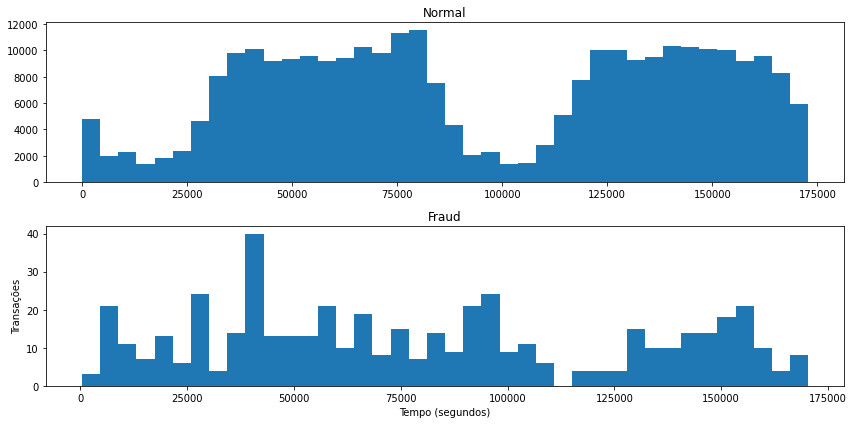

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(normal['Time'], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(fraude['Time'], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

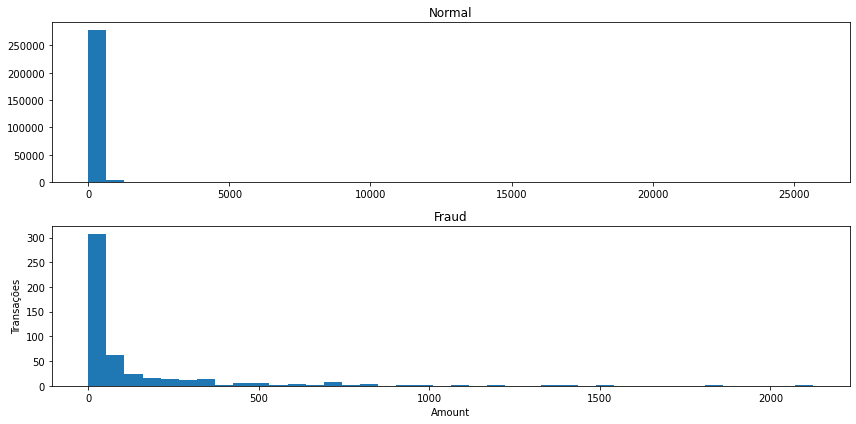

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(normal['Amount'], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(fraude['Amount'], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Amount')
plt.ylabel('Transações')
plt.tight_layout()

Seguindo a análise exploratória, plotou-se os boxplots para ver se há alguma diferença no padrão transações em relação à dimensão Amount.

De uma maneira geral, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de machine learning.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


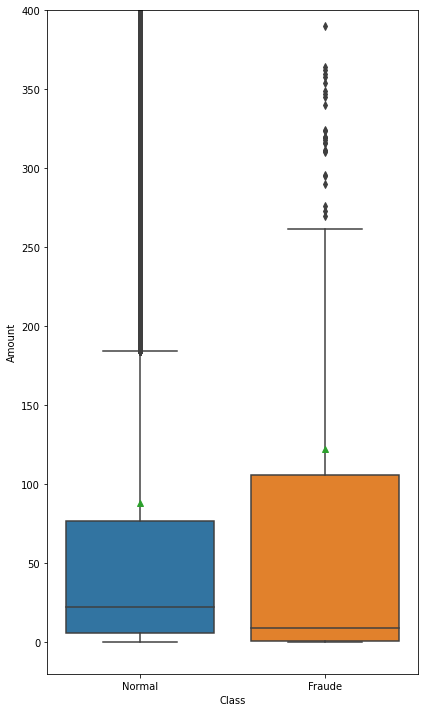

In [ ]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

## Preparação dos Dados


**Balanceando o dataset**

Vou criar um novo dataset que contenha uma distibruição parecida entre as transações fraudulentas e normais. Para isso, vou usar a função sample que escolhe aleatoriamente uma determinada quantidade de dados.

In [ ]:
normal_sample = normal.sample(n=492)

In [ ]:
#Salvando o dataset desbalanceado
df_desb = df.copy()

Concatenando os dados fraudulentos e os legítimos para atualizar o dataframe deixando ele balanceado

In [ ]:
df = pd.concat([normal_sample, fraude], axis=0)

Vamos verificar as dimensões do *dataset* atualizado!!

In [ ]:
print('Dimensões transações legítimas',
    '\nVariáveis: ',normal_sample.shape[1], "\n"
      'Entradas: ', normal_sample.shape[0])
print('Dimensões transações fraudulentas',
    '\nVariáveis: ',fraude.shape[1], "\n"
      'Entradas: ', fraude.shape[0])

Dimensões transações legítimas 
Variáveis:  31 
Entradas:  492
Dimensões transações fraudulentas 
Variáveis:  31 
Entradas:  492


Agora podemos verificar que o novo dataset possui a mesma quantidade de transações fraudulentas e legítimas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

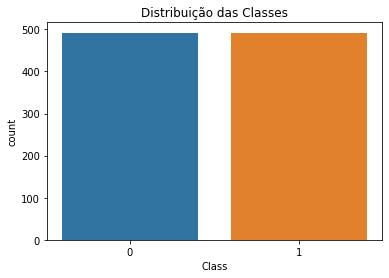

In [ ]:
#visualizando o balanceamento
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes')
plt.plot()

In [ ]:
df_clean = df.copy()
scaler = StandardScaler()
df_clean['std_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

#Visualizar novo dataset
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
240693,-0.457083,-0.623282,0.065528,-1.399806,-0.120458,-0.383089,1.659488,-0.433139,-1.180798,0.135516,-1.456218,-1.317731,-1.285259,0.226657,-0.386190,-1.675630,-0.155054,0.951974,-0.747847,0.028829,-0.375817,-0.966089,0.603292,0.644646,-0.517308,0.298366,-0.163153,-0.033694,0,0.794408,1.305461
92584,1.175453,0.432309,-0.526612,0.773161,0.095474,-0.822850,0.111893,0.057013,-0.171311,-0.535190,1.988204,-0.261481,-2.032797,-0.700923,0.702729,0.479973,1.241557,0.467334,-0.499581,-0.213128,-0.081970,-0.269230,-0.019502,0.062882,0.379612,0.374581,-0.029547,0.027474,0,-0.458311,-0.485933
64821,-0.500894,0.833284,1.286568,0.099620,-0.767268,-0.445565,0.069369,0.446469,-0.711505,-0.527870,1.402280,1.472274,1.294005,0.235948,0.101731,0.624050,-0.629427,0.518162,-0.137391,0.007292,0.346207,0.827339,0.101440,0.593486,-0.409823,0.277482,-0.094018,-0.021952,0,-0.192670,-0.747858
211774,2.034350,-0.343036,-0.783403,-0.156383,-0.069276,-0.009295,-0.446683,-0.039303,1.113546,-0.214602,-1.193032,0.718176,1.334621,-0.234414,0.992611,0.553990,-0.970211,-0.017442,0.201111,-0.046433,-0.183756,-0.448527,0.302212,0.031734,-0.372645,-0.272316,0.004301,-0.030431,0,-0.337624,1.054588
187163,-3.021751,-3.040831,-1.620381,-1.814720,1.697694,-2.427368,0.627269,0.143643,0.611615,-1.817200,-1.047461,0.750280,0.449290,0.893028,0.308891,-0.736557,-0.201937,0.051327,0.289142,1.429796,0.666116,0.471026,0.565874,0.713915,-0.125363,-0.351190,0.239854,-0.227390,0,1.139015,0.824252


**Matriz de correlação**

Correlação significa que existe uma relação entre duas ou mais coisas. No nosso contexto, estamos buscando relação ou semelhança entre as variáveis do *dataset*.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse.

É interessante verificar como o balanceamento é importante na relação entre as variáveis. Perceba que no dataset balanceado fica evidente mais relações entre as variáveis que no *dataset* original.

Text(0.5, 1.0, 'Balanceado')

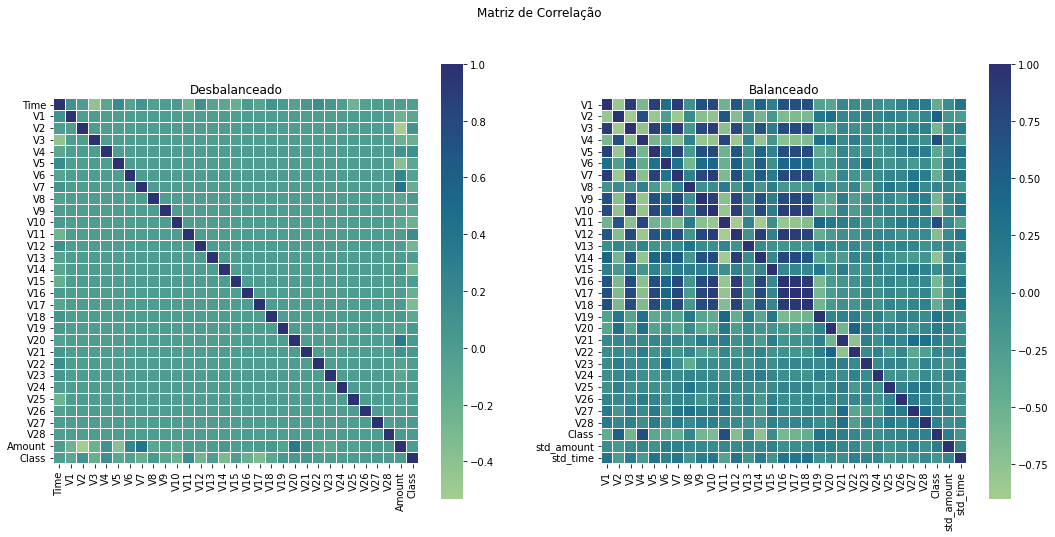

In [ ]:
# criar uma matriz de correlação
corr = df_desb.corr()
corr_smp = df_clean.corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, cmap='crest', linewidths=.004, square=True, linecolor='white', ax=ax[0]);
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_smp, cmap='crest', linewidths=.004, square=True, linecolor='white', ax=ax[1]);
ax[1].set_title('Balanceado')


**Dividir entre conjuntos de Treino e Validação**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre Treino e Validação. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de Treino e Validação tenham a mesma quantidade de classes proporcionalmente, passamos stratify=True.

In [ ]:
#Separar os dados entre feature matrix e target vector 
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

#Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

## Modelo de Machine Learning


Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em X_train e y_train. 

In [ ]:
#escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

#Instanciar e escolher os hyperparameters
model = LogisticRegression()

#Fit do modelo (treinar)
model.fit(X_train, y_train)

#Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

## Avaliar o desempenho do modelo

Com o modelo treinado e as previsões feitas, parte-se para a avaliação do desempenho.
Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada.
Observe a matriz de confusão para ver a taxa de acertos para transações fraudulentes, ou pela coluna recall do Relatório de Classificação.


In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

print('acurácia: ', accuracy_score(y_test, y_pred))
print('AUC: ', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       123
           1       0.95      0.92      0.93       123

    accuracy                           0.93       246
   macro avg       0.94      0.93      0.93       246
weighted avg       0.94      0.93      0.93       246

acurácia:  0.9349593495934959
AUC:  0.9349593495934959


Por fim, vamos plotar a matriz de confusão para ter, pictorialmente, uma visão do desempenho por classes.

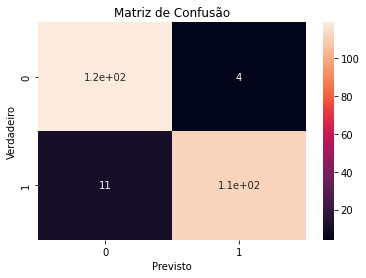

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

## Conclusão

A partir desse projeto foi possível verificar a importância do balanceamento dos dados para o bom funcionamento do modelo de previsão. Foi possível verificar pela matriz de relação como quando o dataset está balanceado, é possível relacionar as variáveis com mais facilidade.
Através da Matriz de confusão é possível também verificar a efetividade do modelo, onde 11 transações foram previstas como legítimas e eram fraudulentas.